<a href="https://colab.research.google.com/github/Hamza-Chekireb/Artificial-Intelligence-Data-Science-Data-Analysis-Portfolio/blob/main/regression_models_house_prices_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importation des bibliothèques nécessaires 
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures


In [ ]:
#Importer les données avec le séparateur,
dataframe=pd.read_csv('/content/kc_house_data.csv')
#Afficher les premieres lignes
dataframe.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# Les informations générales à propos des données
dataframe.info()
# Les informations statistiques à propos des données
dataframe.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# 1. Data preprocessing and data visualization

In [ ]:
# Nettoyage de données
# Les données manquantes
# Afficher le nombre de valeurs manquantes dans chaque colonne
dataframe.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Il n'y a aucune valeur manquante

In [ ]:
# La transformation du type des données

Comme constaté dans les descriptions il n y a pas de valeurs à convertir

In [ ]:
# Enlever les caractéristiques qui influencent pas la colonne "Target"
dataframe.drop( ['id','date'], axis=1,inplace=True)

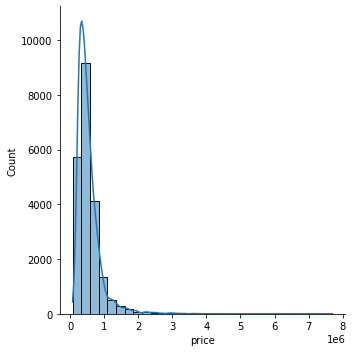

In [ ]:
# Affichage de la distribution de la colonne target 'price'. 
sns.displot(data=dataframe['price'],bins=30, kde=True);

Dans cette étape nous utilisons la corrélation entre les caractéristiques et les targets afficher avec **l'heatmap** pour pouvoir prendre la décision des colonnes qui impactent la sortie et celle qui n'impactent pas.

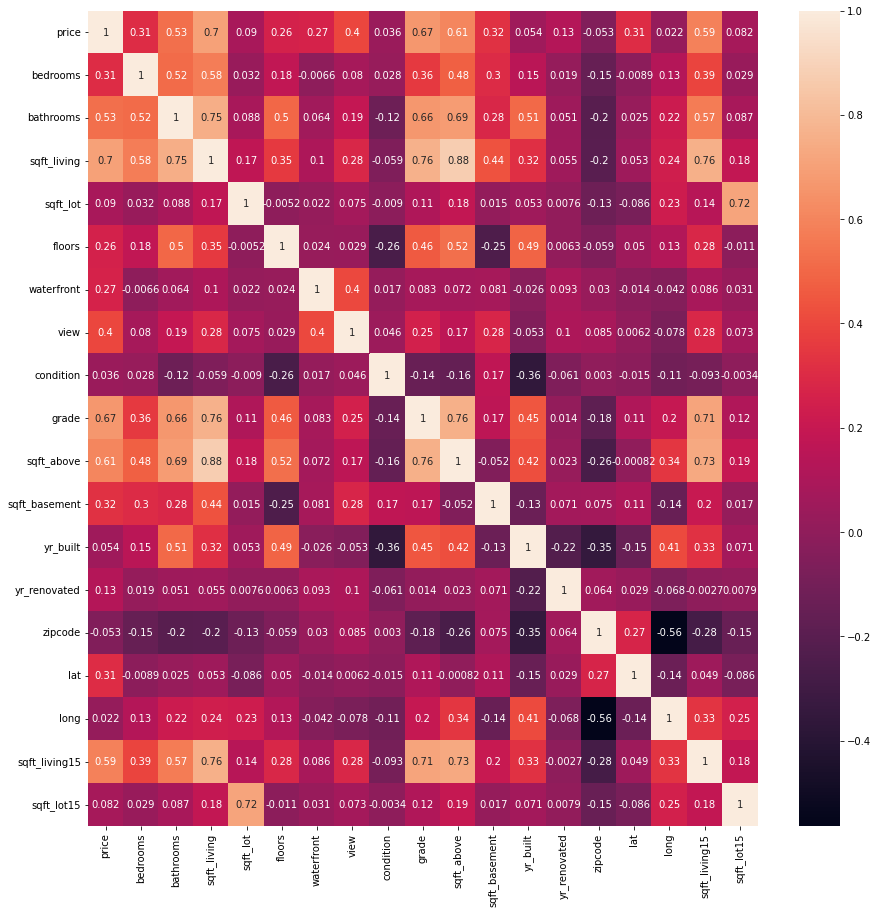

In [ ]:
plt.figure(figsize=(15,15))
cor=dataframe.corr() #Calcul de la matrice de corrélation
cor
sns.heatmap(cor,annot=True) #Affichage de la matrice de corrélation

# 2.   Feature selection: 

Pour entrainer le modèle de régression linéaire, il faut bien sélectionner les caractéristiques à forte corrélation avec la variable target « prix ».
En annalysant la matrice de corrélation, nous pouvons constater que 'sqft_living' a une forte corrélation positive avec le 'prix' cible (0,7), d'autre part, 'grade', 'sqft_above', 'sqft_living15' et 'bathrooms' ont une corrélation positive modérée avec le "prix" cible
(respectivement 0,67, 0,61, 0,59, 0,53).
Dans ce premier modèle nous utilisons la caractéristique avec la plus grande valeur de corrélation qui est 'sqft_living'

# 3. Spliting dataset into a training set and a testing set: 

In [ ]:
#input, output split.
x=np.array(dataframe["sqft_living"])
x=x.reshape(-1,1)
y=np.array(dataframe["price"])
y=y.reshape(-1,1)

#train, test split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10) 

# 4. Linear regression: 

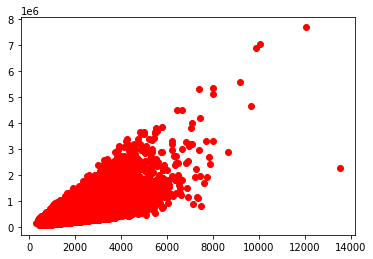

In [ ]:
plt.scatter(x,y,color="r");


In [ ]:
model=LinearRegression()   #Construire le modèle linéaire
model.fit(x_train,y_train)  #Ajuster le modèle linéaire
# Afficher les coefficients(Les paramètres) du modèle 
print(model.coef_)
print(model.intercept_)

[[277.36412987]]
[-36738.17734638]


# 5. Plot the linear regression. 

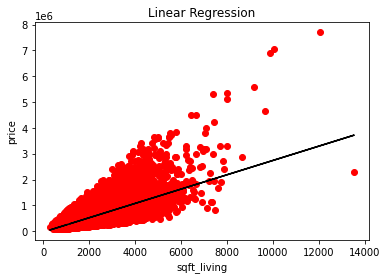

In [ ]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x,model.predict(x),color="k")
plt.show()

# 5. The performance of linear regression using the testing set. 

In [ ]:
# Evaluer la performance du modèle
predicted=model.predict(x_test) 
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted)) 

MSE 71973967322.16974
R squared 0.5073460545260231


Interprétation:

Le r au carré est égal à 0,5073460545260231 ce qui révèle que seulement 50% du comportement observée dans la variable cible « prix » est expliquée par ce modèle de régression linéaire. Donc, nous pouvons dire que ce modèle ne fonctionne pas très bien.


# 6.  multiple-linear regression:

In [ ]:
#Input
inputs=dataframe.drop(columns=['price'])
x=np.array(inputs)

#Train,test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=15) 

#Construction du model 
model=LinearRegression()

#Ajustement du modèle
model.fit(x_train,y_train) 

#Calculer les prédictions
predicted=model.predict(x_test)

#Coefficients
print(model.coef_)
print(model.intercept_)

#Evaluation du modèle
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

[[-3.62066781e+04  4.41908101e+04  1.10999400e+02  1.60557388e-01
   5.65904956e+03  5.31508877e+05  5.33866331e+04  2.75088422e+04
   9.41997473e+04  7.43463668e+01  3.66530332e+01 -2.61941264e+03
   2.19917560e+01 -5.98415406e+02  6.11200394e+05 -2.26288796e+05
   2.04288093e+01 -4.45564211e-01]]
[6445131.60799409]
MSE 36278505619.895996
R squared 0.7177851734361422


Comparaison entre le modèle linéaire et le modèle multi-linéaire :

Nous observons que le modèle multi-linéaire est plus performant que le modèle linéaire.

# 7. Polynomial regression 

In [ ]:
#Input, output split et transformation en tableau numpy
x=np.array(dataframe["sqft_living"])
x=x.reshape(-1,1)
y=np.array(dataframe["price"])
y=y.reshape(-1,1)

#Train, test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=15) #splitting data with test size 20 %

#Construction d'un modèle linéaire 
lg=LinearRegression()

#
poly = PolynomialFeatures(degree = 2)


#Transformation des inputs(donner un comportement polynomial aux inputs)
x_train_fit = poly.fit_transform(x_train) 

#Ajustement du modèle
lg.fit(x_train_fit, y_train)

#Transformation de l'ensemble x_test
x_test_ = poly.fit_transform(x_test)

# Calculer l'ensemble de prédiction
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  71937308017.89713
R squared:  0.4403910922227273


Interprétation:

Il semble que la régression polynomiale ne fonctionne pas bien car son R au carré est inférieur à 0,5 et c'est évident comme résultat car le prix ne suit pas un comportement polynomial.
Essayons donc avec un polynôme multiple.

In [ ]:
inputs=dataframe.drop(columns=['price'])
x=np.array(inputs)
y=np.array(dataframe["price"])
y=y.reshape(-1,1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=15) #splitting data with test size 20 %

lg=LinearRegression()

poly = PolynomialFeatures(degree = 2)


x_train_fit = poly.fit_transform(x_train) 

 
lg.fit(x_train_fit, y_train)

x_test_ = poly.fit_transform(x_test)

predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  23535500260.85225
R squared:  0.8169145335311888


Comparaison between  Polynomial, linear and  multilinear regression: 

En comparant les **R au carré** des différents modèles, nous constatons facilement que le modèle multipolynomial fournit la meilleure prédiction du prix en fonction des différentes caractéristiques.